<a href="https://colab.research.google.com/github/Kedarpatil24/Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

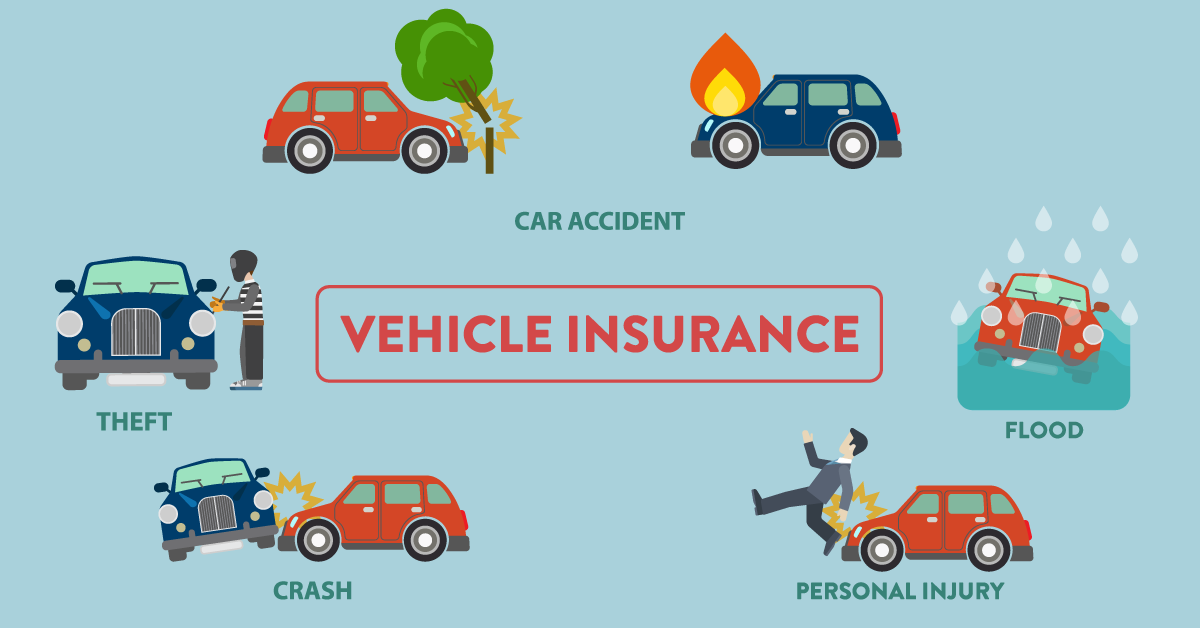

# **Problem Statement**

---
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

# **Attribute Information**

1. **id :**	Unique ID for the customer

2. **Gender	:** Gender of the customer

3. **Age :**	Age of the customer

4. **Driving_License	0 :** Customer does not have DL, **1 :** Customer already has DL

5. **Region_Code :**	Unique code for the region of the customer

6. **Previously_Insured	: 1 :** Customer already has Vehicle Insurance, **0 :** Customer doesn't have Vehicle Insurance

7. **Vehicle_Age :**	Age of the Vehicle

8. **Vehicle_Damage	 :1 :** Customer got his/her vehicle damaged in the past. **0 :** Customer didn't get his/her vehicle damaged in the past.

9. **Annual_Premium	:** The amount customer needs to pay as premium in the year

10. **PolicySalesChannel :**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. **Vintage :**	Number of Days, Customer has been associated with the company

12. **Response :	1 :** Customer is interested, 0 : Customer is not interested

In [42]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [43]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import time
from datetime import datetime
from math import sqrt

# Model Selection and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve,classification_report
# Feature Engineering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Hyperparamter Tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [44]:
#Let’s read the data.
df=pd.read_csv('/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/HEALTH INSURANCE CROSS SELL PREDICTION/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#look at the top 5 rows in the dataframe
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [47]:
# lets check last few rows
df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [48]:
# rows and column
df.shape

(381109, 12)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


* #### **In this dataset, we have  total 12 columns. out  of these six are int64, three are float64 and three object type.**

In [50]:
# statical summary
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [51]:
# check NaN values count
df.isna().sum().to_frame().rename(columns={0:'Missing Value '}).style.background_gradient(cmap='Blues_r')

,Missing Value
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


* #### ***We don’t have any missing values in this data.***

In [52]:
# Number of columns and number of unique values present in it

print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} --> {df[i].nunique()}')

columns and number of unique values
id --> 381109
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


In [53]:
# check duplicates
df.duplicated().sum()

0

In [54]:
# target variable
dependable_variable=df['Response']

* #### ***It is also important to look at the target column, as it will tell us whether the problem is a balanced problem or an imbalanced problem. This will define our approach further.***

# **Univariate Analysis**

Text(0.5, 1.0, 'Customers Segregation')

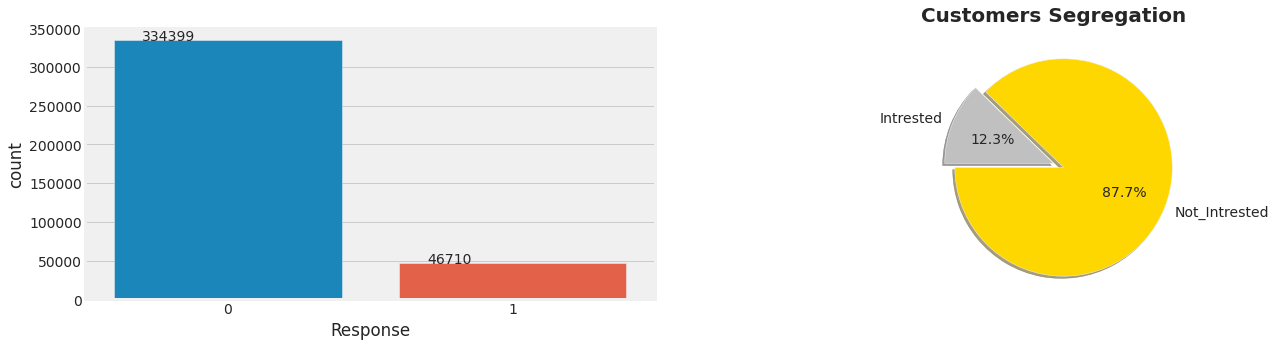

In [55]:
# plot target variabler
plt.figure(figsize=(20,5))
plt.style.use('fivethirtyeight')
plt.subplot(121)
ax1=sns.countplot(x=df.Response)
for i in ax1.patches:
        ax1.annotate('{:}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+32))

# pie chart
plt.subplot(122)
plt.style.use('fivethirtyeight')
labels='Not_Intrested','Intrested'
sizes = df.Response.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.title("Customers Segregation",size=20,fontdict={"weight": "bold"})



* **The given dataset is an imbalance problem as the Response variable with the value 1 is significantly lower than the value zero.**
* **The people not interested is 87 % as compared to the interested once.**

In [56]:
# list of numerical feature
Numerical_features=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [57]:
# list of categorical feature
Categorical_features=['Gender','Driving_License','Previously_Insured','Vehicle_Damage','Vehicle_Age']

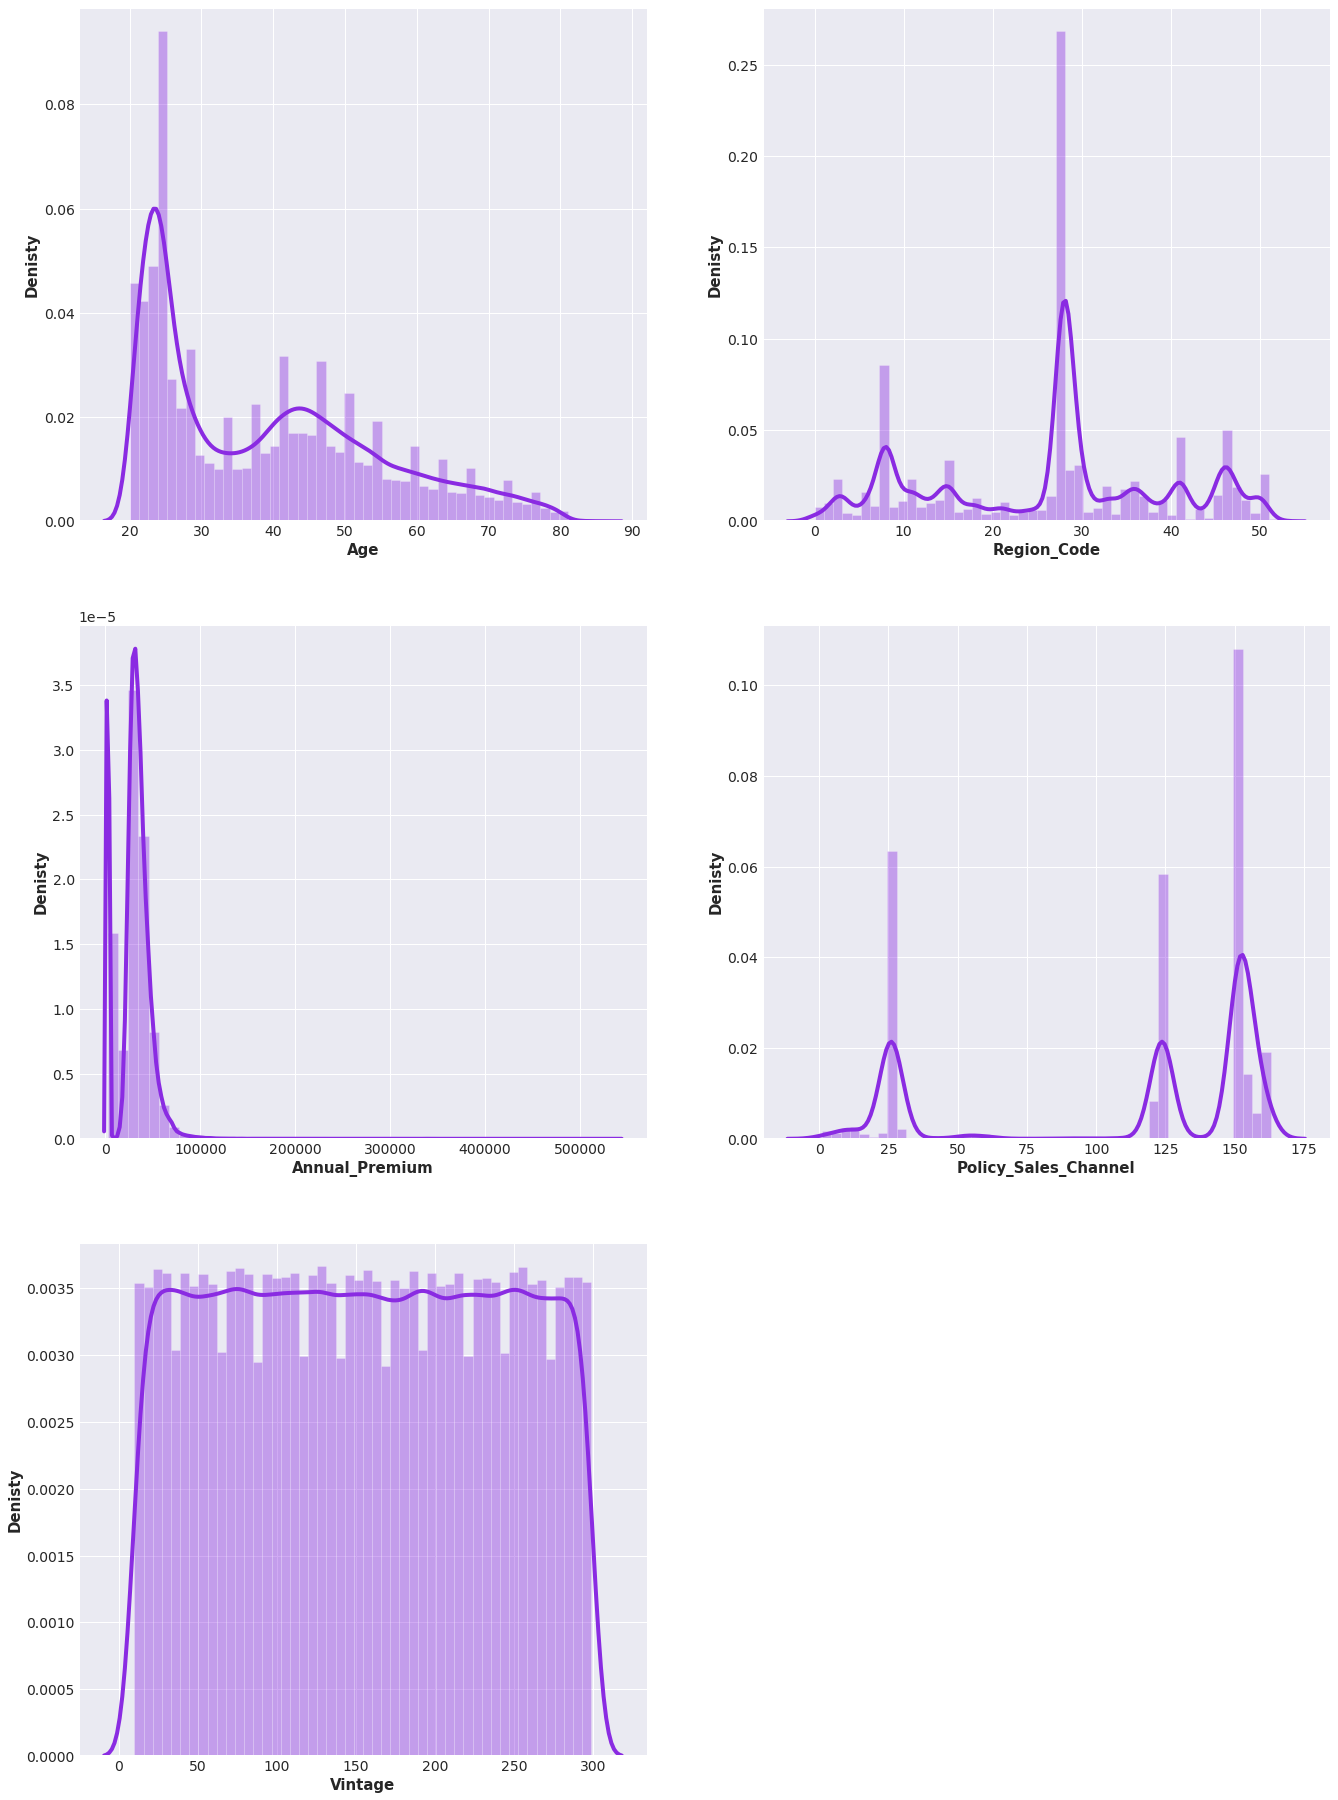

In [58]:
# Let's create subplot of histogram for all Numerical Features

Feature=Numerical_features  # List of all Numerical Features

axes=[]  # For axis

a=0      # No of rows

# Range for subplots 

while a < 3 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(3,2,figsize=(20,30))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Density', fontsize=15,fontdict={"weight": "bold"})

for i in range (5):
  ax1=sns.distplot(df[Feature[i]],ax=axis[axes[i][0],axes[i][1]],color = 'BlueViolet')
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[2,1]) # Delete extra subplot

In [59]:
df[['Annual_Premium','Vintage','Policy_Sales_Channel']].describe()

,Annual_Premium,Vintage,Policy_Sales_Channel
count,381109.000000,381109.000000,381109.000000
mean,30564.389581,154.347397,112.034295
std,17213.155057,83.671304,54.203995
min,2630.000000,10.000000,1.000000
25%,24405.000000,82.000000,29.000000
50%,31669.000000,154.000000,133.000000
75%,39400.000000,227.000000,152.000000
max,540165.000000,299.000000,163.000000


*  ***we have the distribution of the age. Most of the customers fall in the 20 to 50 age range.***

*  ***Similarly, we can see the distribution of annual premium are positively skwed.***

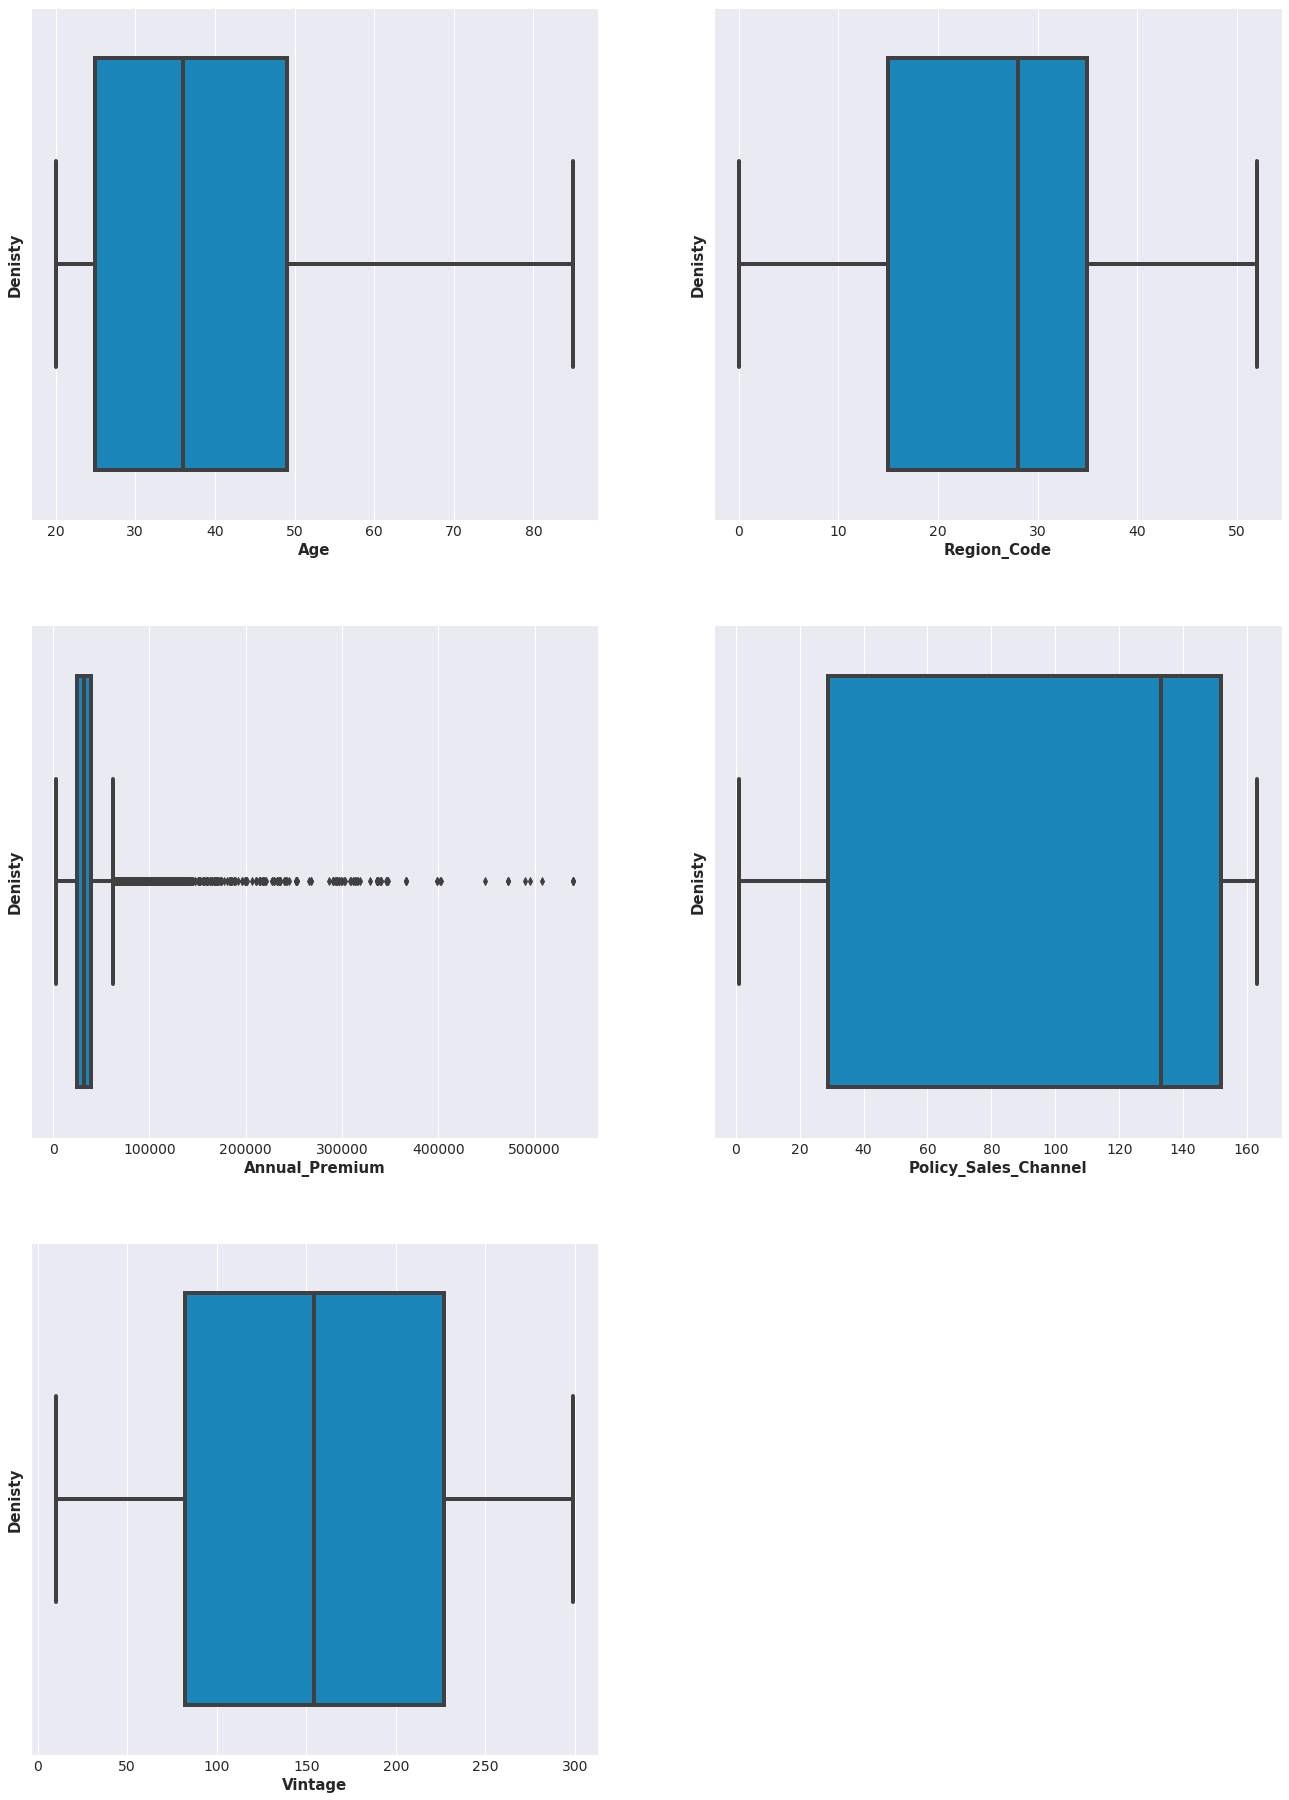

In [60]:
# Let's create subplots of Boxplot for all Numerical Features

Feature=Numerical_features  # List of all Numerical Features

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 3 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(3,2,figsize=(20,30))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Density', fontsize=15,fontdict={"weight": "bold"})

for i in range (5):
  ax1=sns.boxplot(df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[2,1]) # Delete extra subpl

*  ***from the above boxplot we can see that there's a lot of outliers in the annual premium. this will need to be scaled with robust scaler to better the evaluation matrix.***

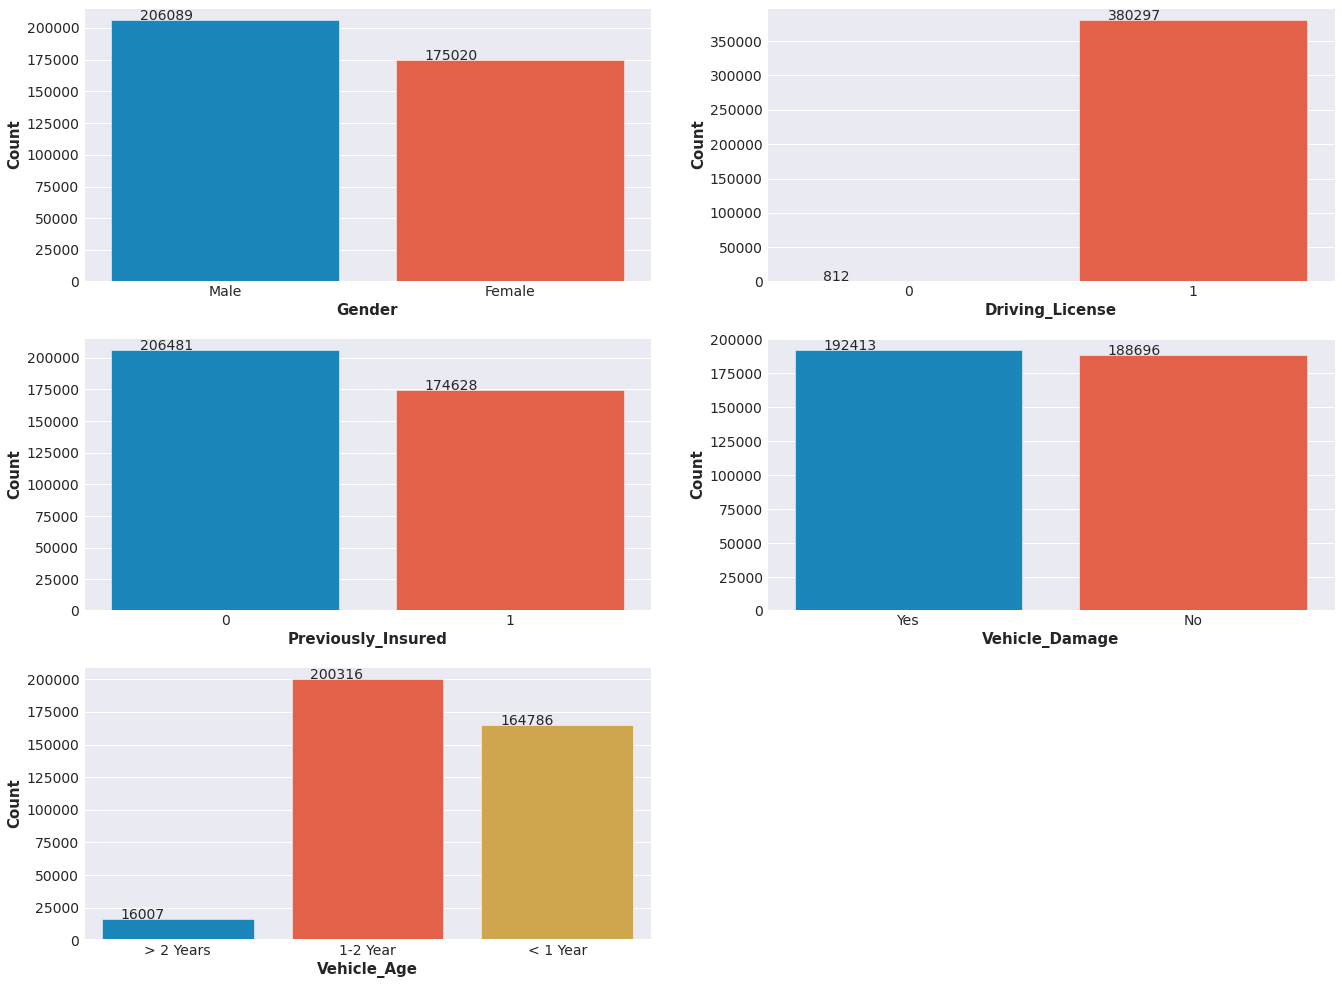

In [61]:
# Let's create subplot of Countplot for all Categorical variables

Feature=Categorical_features  # Lsit of all Categorical variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 3 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(3,2,figsize=(20,16))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('count', fontsize=15,fontdict={"weight": "bold"})

for i in range (5):
  ax1=sns.countplot(df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Count',size=15,fontdict={"weight": "bold"})

  for i in ax1.patches:
        ax1.annotate('{:}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+32))

figure.delaxes(axis[2,1]) # Delete extra subplot

#### ***1) 54 % of the customer of the health insurance is male.***

#### ***2) 99 % customers has a License.***

#### ***3) More than half of the customers does not have a vehicle insurance .***


#### ***4) Half of the health insurance customer have had their vehicle damaged and half have not.***


#### ***5) 95 % of health insurance customers have vehichle that's less than 2 years of Vehicle Age.*** 

# **Bivariate Analysis**

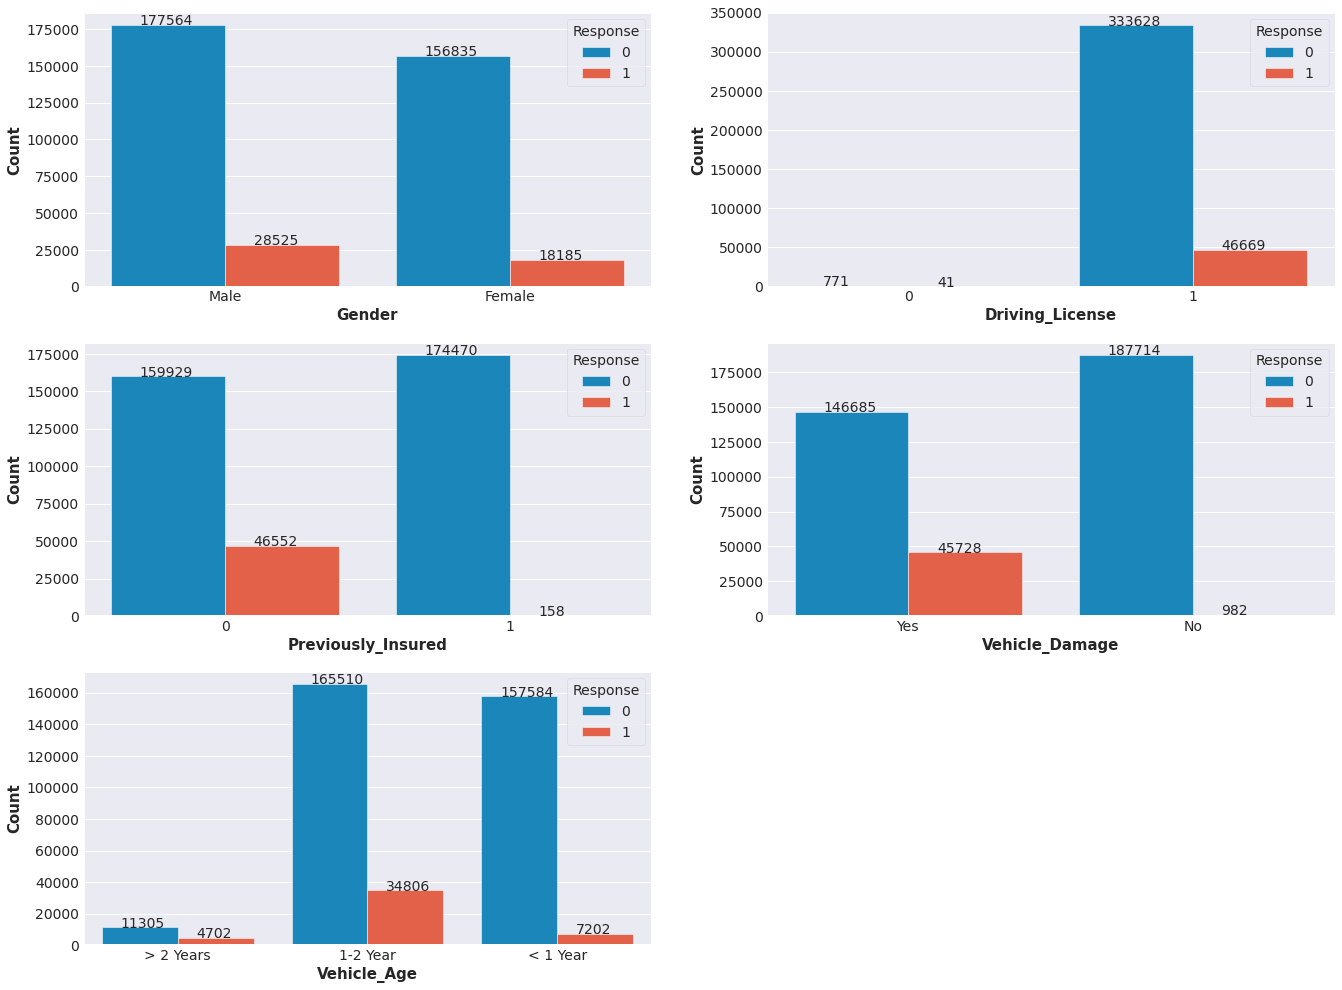

In [62]:
# Let's create subplot of Countplot for all Categorical variables

Feature=Categorical_features  # Lsit of all Categorical variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 3 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(3,2,figsize=(20,16))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('count', fontsize=15,fontdict={"weight": "bold"})

for i in range (5):
  ax1=sns.countplot(df[Feature[i]],ax=axis[axes[i][0],axes[i][1]],hue=df['Response'])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Count',size=15,fontdict={"weight": "bold"})

  for i in ax1.patches:
        ax1.annotate('{:}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+32))

figure.delaxes(axis[2,1]) # Delete extra subplot




> ### ***From the above visualizations, we can make the following inferences.***

* ***The male customers own slightly more vehicles and they are more tend to buy insurance in comparison to their female counterparts.***

* ***Similarly, the customers who have driving licences will option for insurance instead of those who don’t have it.***

* ***The third visualization depicts that the customers want to have only an insurance policy. It means those who already have insurance won’t convert.***


* ***From the  plot, we can conclude that if the vehicle has been damaged previously then the customer will be more interested in buying the insurance as they know the cost.***


* ***In the last chart, the customers with vehicle age lesser than the 2 years are more tend to buy insurance.customers who has vehicle that's older than 2 years our analysis before mentioned that only less than one percent of car that's older than 2 years are previouly insured, by not having a vehicleinsurance they're more likely to be intersted with our vehicle insurance, our data show's that customer who has car that's more than 2 years are 7 times more likely to be intersted with vehicle insurance compared to customer who own a vehicle less than one year.***

> * ***More than half of the data (52%)  with vehicle age between 1-2 years.***
* **We can't say from graph that people with vehicle age between 1-2 years are more interested because other category '>2 years' has very few observations.**





<AxesSubplot:xlabel='Age', ylabel='Density'>

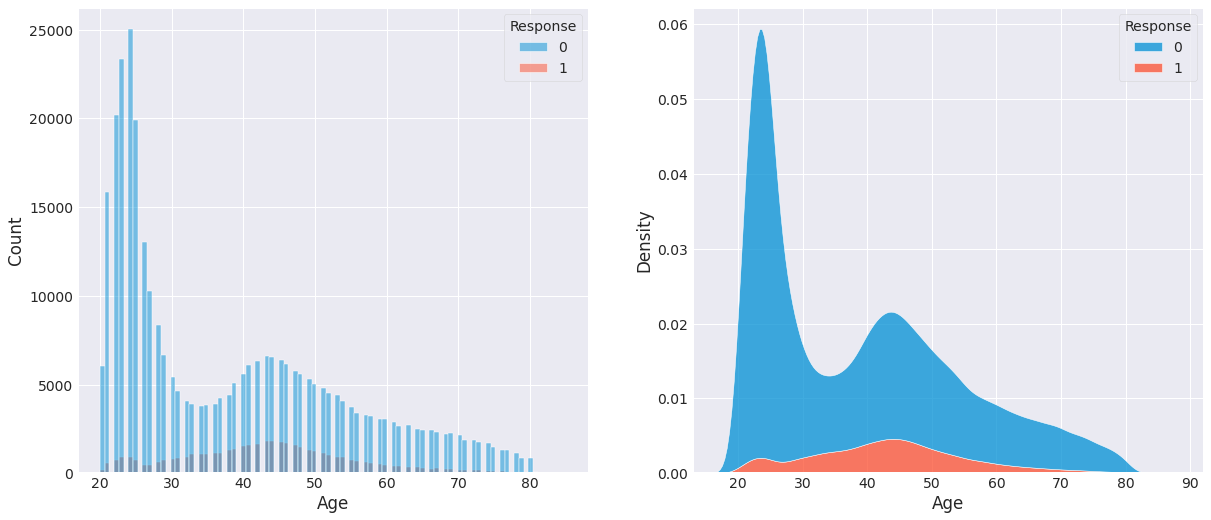

In [63]:
# how age influence with response
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
sns.histplot(x='Age', data=df, hue='Response')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Age'], hue = df['Response'], multiple="stack")

> People aged between 30-60 are more likely to be interested.

* **our analysis shows that age(30-60) has the highest percentage to be intersteed with vehicle insurance, to be precise, 21 % of people(30-60) are interested with vehicle insurance.**

* **This might be because 72% age(30-60) does not have a vehicle insurace, and GEN X has the highest percentage of vehicle damager the past (67%) among other generation.**


* **Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.**



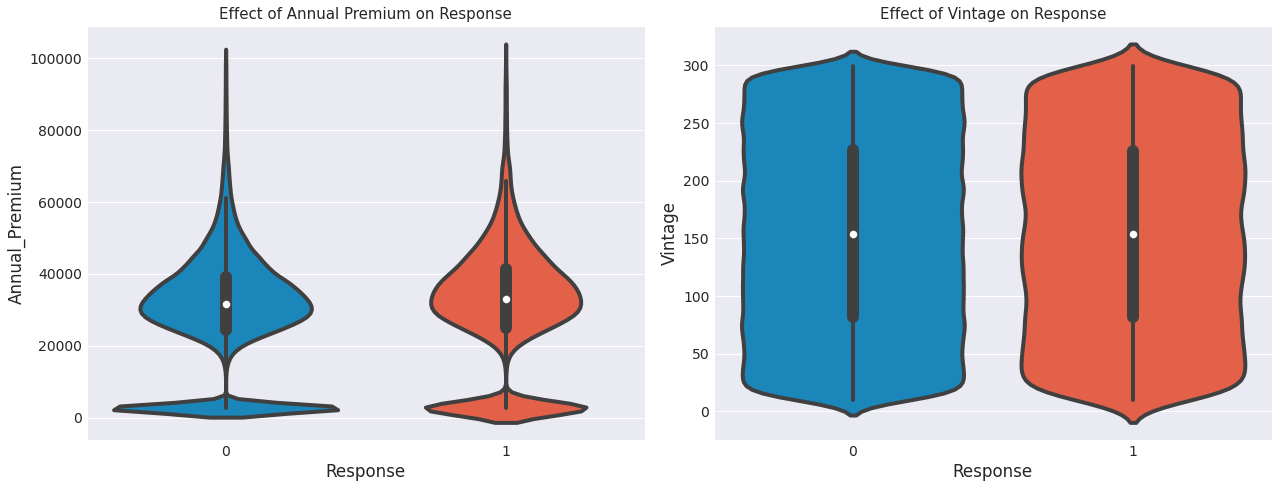

In [64]:
# annual premium and vintage 
plt.figure(figsize=(18,7))
plt.subplot(121)
plt.title('Effect of Annual Premium on Response',fontsize=15)
ax = sns.violinplot(data=df[df['Annual_Premium']<100000], y="Annual_Premium", x="Response")
plt.subplot(122)
plt.title('Effect of Vintage on Response',fontsize=15)
bx = sns.violinplot(data=df, y="Vintage", x="Response")
plt.tight_layout()
plt.show()

* **Annual Premium and Vintage effect is very less on Vehicle Insurance Response.**

<Figure size 576x432 with 0 Axes>

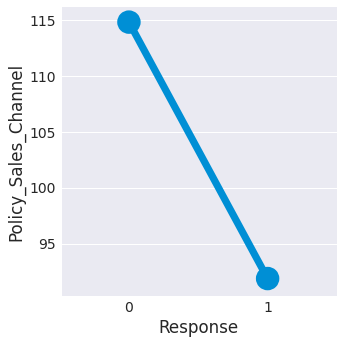

In [65]:
# plot for policy sales channel
plt.figure(figsize=(8,6))
ax1 = sns.factorplot(x ='Response', y ='Policy_Sales_Channel', data = df)

<AxesSubplot:>

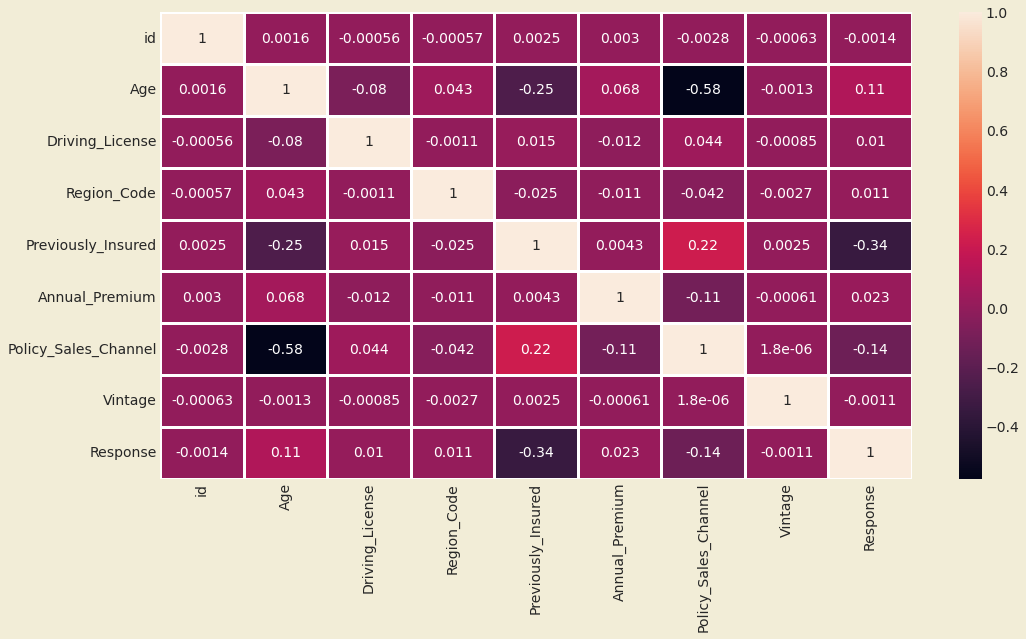

In [66]:
# heatmap
fig=plt.figure(figsize=(15,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.heatmap(data=df.corr(),annot=True,linewidth=3)

* It appears **policy sales channel** and **vintage** are more **negatively** correlated to the target variable response.

# **Data preprocessing**

***The next step in the project is to prepare the data for the modelling. The following preprocessing techniques are being used here***

* ***Convert the categorical features into dummies or doing categorical encoding.***

* ***Binning the numerical features.***
* ***dropping the unnecessary columns like ids.***

In [67]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [68]:
## binning the annual premium into groups 

bin_premium_group = [2600, 25000, 50000, 100000, 200000, df['Annual_Premium'].max()]
label_bin = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']

df['premium_group'] = pd.cut(df['Annual_Premium'], bins = bin_premium_group, labels = label_bin)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,premium_group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Silver
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Silver
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Silver
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Silver
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Silver


In [69]:
pd.crosstab(index = df['Response'], columns = df['premium_group'])

premium_group,Bronze,Silver,Gold,Platinum,Diamond
Response,,,,,
0,89142,217952,26650,565,90
1,11821,29990,4776,101,22


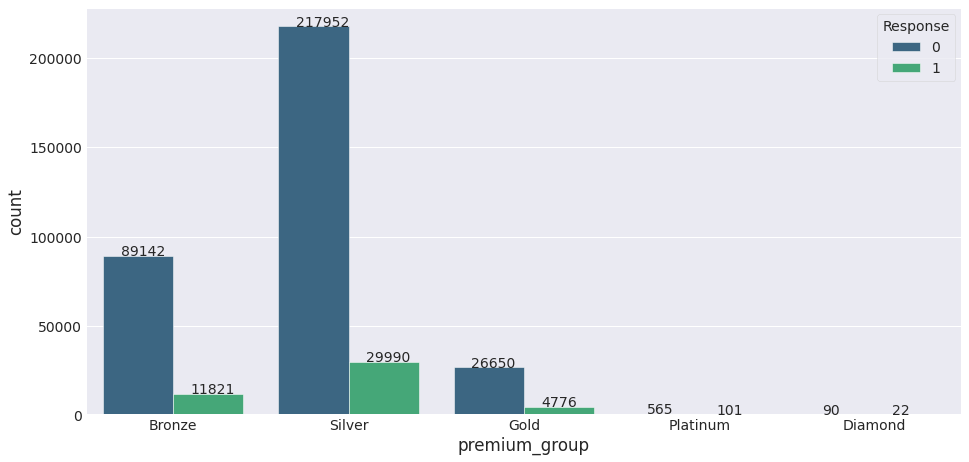

In [70]:
# plot graph
plt.figure(figsize = (14, 7))
ax1 = sns.countplot(df['premium_group'], hue = df['Response'], palette = 'viridis')

for i in ax1.patches:
        ax1.annotate('{:}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+32))


* **The more expensive the premium group the more likely the customer are interested with the vehicle insurance.**

* **The annual premium rate is the most critical factor in determining whether a customer will renew their insurance. Lower annual prices are more likely to encourage customers to renew and vice versa.**

In [71]:
## Region 

top_5_region =  pd.crosstab(index = df['Region_Code'], columns = df['Response']).sort_values(1, ascending = False).head()
top_5_region

Response,0,1
Region_Code,,
28.0,86498,19917
8.0,30620,3257
41.0,16039,2224
46.0,17717,2032
29.0,9700,1365


In [72]:
pd.crosstab(index = df['Region_Code'], columns = df['Response'], normalize = 'index').sort_values(1, ascending = False).head()

Response,0,1
Region_Code,,
38.0,0.807996,0.192004
28.0,0.812837,0.187163
19.0,0.837134,0.162866
4.0,0.841755,0.158245
23.0,0.846939,0.153061


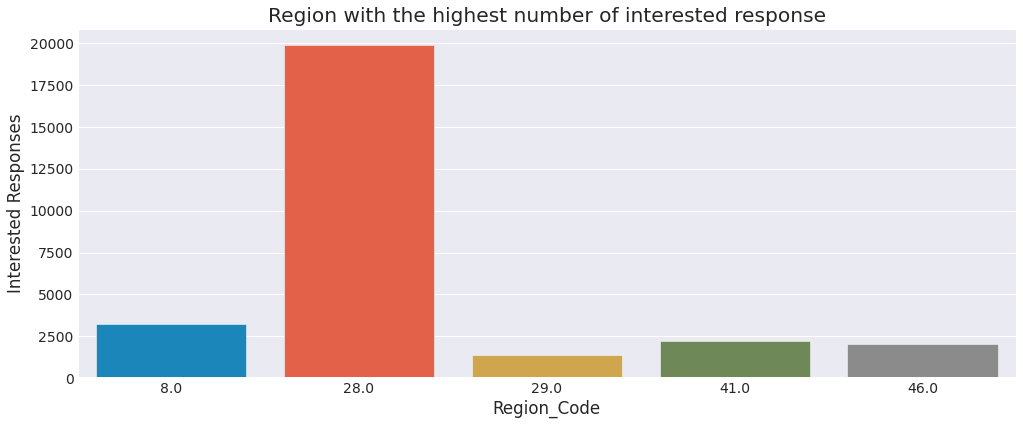

In [73]:
# top region
plt.figure(figsize = (15, 6))

ax1 = sns.barplot(x = top_5_region.index, y = top_5_region[1])
plt.ylabel('Interested Responses')
plt.title('Region with the highest number of interested response')
plt.show()

* **In region 28 the people are highly intersted in buying insurance than other region.**

### We will Drop of Vintage as we observe their impact on Response is not encouraging.

In [74]:
# dropping column
df.drop(columns=['id','Vintage','Annual_Premium'],inplace=True)

In [75]:
# categorical to numeric
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [76]:
# categorical to numeric
df['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace=True)
df['Vehicle_Age']=df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2, '> 2 Years':3})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response,premium_group
0,1,44,1,28.0,0,3,1,26.0,1,Silver
1,1,76,1,3.0,0,2,0,26.0,0,Silver
2,1,47,1,28.0,0,3,1,26.0,1,Silver
3,1,21,1,11.0,1,1,0,152.0,0,Silver
4,0,29,1,41.0,1,1,0,152.0,0,Silver


In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'premium_group' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['premium_group','Vehicle_Age']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

#view final df
final_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response,premium_group,0,1,2,3,4,5,6,7
0,1,44,1,28.0,0,3,1,26.0,1,Silver,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,76,1,3.0,0,2,0,26.0,0,Silver,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,47,1,28.0,0,3,1,26.0,1,Silver,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,21,1,11.0,1,1,0,152.0,0,Silver,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,29,1,41.0,1,1,0,152.0,0,Silver,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,2,0,26.0,0,Silver,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
381105,1,30,1,37.0,1,1,0,152.0,0,Silver,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
381106,1,21,1,30.0,1,1,0,160.0,0,Silver,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
381107,0,68,1,14.0,0,3,1,124.0,0,Silver,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
# drop column

final_df.drop(['premium_group','Vehicle_Age'],inplace=True,axis=1)
final_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Response,0,1,2,3,4,5,6,7
0,1,44,1,28.0,0,1,26.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,76,1,3.0,0,0,26.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,47,1,28.0,0,1,26.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,21,1,11.0,1,0,152.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,29,1,41.0,1,0,152.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


#### ***data has been preprocessed we can perform some operations.***

# **Seperate target varible and independent variables**

In [80]:
# independent variable
X=final_df.drop(['Response'],axis=1)
print(X.shape)

# dependent variable
y=final_df['Response']
print(y.shape)

(381109, 15)
(381109,)


# **Handle Imbalance Data Problem**
----
When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

In [81]:
# store feature names
Features = X.columns

In [83]:
# for imbalnce dataset
randomsample =  RandomUnderSampler()
x_new,y_new=randomsample.fit_resample(X,y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
plt.figure(figsize=(8,5))
sns.countplot(y_new,palette='husl')

TypeError: ignored

# **Feature Scaling**

In [ ]:
#dividing the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#feature scaling
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Baseline Models**

In [ ]:
# model initalize
model = {
    "Decision Tree": DecisionTreeClassifier(), 
    "Logistic Regression":LogisticRegression(),
    "Random Forest" : RandomForestClassifier(), 
    "Gradient Boosting" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier(),
    "LGBM" : LGBMClassifier()
        }

In [ ]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    try:
        score = classifier.predict_proba(X_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        precision_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred, average='weighted'),
        roc
    ])

In [ ]:
# create dataframe for model results
scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df

* **Out of six models LGBM ,Gradient Boosting and XGBoost gives good results in terms if recall and ROC AUC.**

* **For hyperparamter tuning i choose LGBM and XGBoost.**

In [ ]:
# plot roc curve for all models
plt.figure(figsize=(10,6))
plt.title('ROC Curves of Classifiers')
plt.xlabel('Precision')
plt.ylabel('Recall')

for key in prob_score:
    fpr, tpr, _ = roc_curve(y_test, prob_score[key])
    plt.plot(fpr, tpr, label=key)

plt.plot((0,1), ls='dashed',color='black')
plt.legend()
plt.show()

# **Hyperparameter Tuning**
---
**Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.**

> * **We select LGBM XGBoost Model for hypertuning because it has highest ROC Score.**

In [ ]:
# make dict
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [ 1, 2, 5, 7, 10, 50,55, 100],
             'reg_lambda': [ 1, 5, 10,12, 20, 50, 100]}


In [ ]:
# lgbmclassifier
clf = LGBMClassifier(max_depth=-1, random_state=15, silent=True, metric='None', n_jobs=4, n_estimators=5000)
random_search = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=15,
    verbose=True)

In [ ]:
# fitting train data
random_search.fit(X_train, y_train)

In [ ]:
# best prameter
print('Best score reached: {} with params: {} '.format(random_search.best_score_, random_search.best_params_))

In [ ]:
# predict
randomsearch_predictions = random_search.predict( X_test ) 
  
# print classification report 
print(classification_report(y_test, randomsearch_predictions)) 

In [ ]:
# plot roc curve for lgbm model
plt.figure(figsize=(10,6))
plt.title('ROC Curves of Classifiers')
plt.xlabel('Precision')
plt.ylabel('Recall')
fpr, tpr, _ = roc_curve(y_test, prob_score[key])
plt.plot(fpr, tpr, label=key)

plt.plot((0,1), ls='dashed',color='black')
plt.legend()
plt.show()


# **XGBoost**

In [ ]:
# make dict
params = {
    "max_depth" : range(2,10,1),
    "n_estimators" : range(60,220,40),
    "learning_rate" : [0.1,0.01,0.05]}

In [ ]:
# Xgboostclassifier
model_xgb = XGBClassifier()
random_search = RandomizedSearchCV(
    estimator=model_xgb, param_distributions=params, 
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=15,
    verbose=True)

In [ ]:
# fitting train data
random_search.fit(X_train, y_train)

In [ ]:
# best prameter
print('Best score reached: {} with params: {} '.format(random_search.best_score_, random_search.best_params_))

In [ ]:
# predict
randomsearch_predictions = random_search.predict( X_test ) 
  
# print classification report 
print(classification_report(y_test, randomsearch_predictions)) 

# **Conclusion**

* **The given dataset is an imbalance problem as the Response variable with the value 1 is significantly lower than the value zero.**

* **The male customers own slightly more vehicles and they are more tend to buy insurance in comparison to their female counterparts.**

* **Similarly, the customers who have driving licences will option for insurance instead of those who don’t have it.**

* **Customers who never had vehicle damaged only 0.5 % of those customers are intersted with vehicle insurance, 87% of customers who never had any vehicle damaged already have a vehicle insurance.we can conclude that if the vehicle has been damaged previously then the customer will be more interested in buying the insurance as they know the cost.**


* **From this dataset of health insurance customers almost 95% of customers have a vehicle age that's less than 2 years. from our analysis, customers who has more than 2 years of vehicle age are more interested with vehicle insurance advertisment, while customers who has less then one year of vehicle age, only 4% of them are actually interesred with vehicle insurance.**

* **we also found out that a newer vehicle are more likely to have a vehicle insurance, with vehicle that's less than one year 66% of those are insured , vehicle that's older than one year but less than 2 years are 33% insured, while less than one percent of vehicle that's older than 2 years are insured. This should explain why customer who owns a newer vehicle are less likely to be intersted with insurance promotion, because they probably alredy have one.**

* **Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.**

---
### **So who's actually interested with our vehicle insurance ?**

>From the responses there are 12 % of our health insurance customers are interested with the vehicle insurance product but who are those people?
---
* **First, Customer who does not have a a vehicle insurance, out of all customers who does not have a vehicle insurance 22.5 % of them says that they're interested with vehicle insurance product.**

* **customers who has vehicle that's older than 2 years our analysis before mentioned that only less than one percent of car that's older than 2 years are previouly insured, by not having a vehicle insurance they're more likely to be intersted with our vehicle insurance, our data show's that customer who has car that's more than 2 years are 7 times more likely to be intersted with vehicle insurance compared to customer who own a vehicle less than one year.**

* **customers who have had a vehicle damaged in the past from our analysis we found out that 97% customers who actually intersted with vehicle insurance have had their vehicle damaged in the past.**

---
#### **Which Customer Generation that's most likely to be interested in Vehicle insurance ?**
---
> People aged between 30-60 are more likely to be interested.

* **our analysis shows that age(30-60) has the highest percentage to be intersteed with vehicle insurance, to be precise, 21 % of people(30-60) are interested with vehicle insurance.**

* **This might be because 72% age(30-60) does not have a vehicle insurace, and GEN X has the highest percentage of vehicle damager the past (67%) among other generation.**

----
#### **Which Customer Generation are less likely to be intersted with vehicle insurance the answer is people in age group of 18 - 34 only 6% of people are actually interested with vehicle insurance, and why is so?**
----
* **almost 63% of millenials already have vehicle insurance, from our analysis before owning vehicle insurance is a major factor why someone is not interested with another vehicle insurance.**

* **90% of millenials have a vehicle that's less than one year of age, and from our analysis before that vehicle that's less than one year are 66% already insured.**
> This conculed that age between (30-60)  are more likely to already have a vehicle insurance before our vehicle insurance team approached, and that's a major factor why 30-60 are least likely to be interested with our vehicle insurance, because they already have one
---
---
#### **Using the LGBMClassifier and XGBoostClassifier that has recall of 80% will speed up and find out which customer who actually intersted in vehicle insurance, and we could focus our resource just based on the customers that's interested.**

---
---



* **We found out that customer who already have vehicle insurance are almost have no interest in another vehicle insurance. Our analysis shows that 99.9% of customers that have a vehicle insurance is not interested in another vehicle insurance, while customer who doesn't have a vehicle insurance 22.5 % of them are interested with vehicle insurance.**



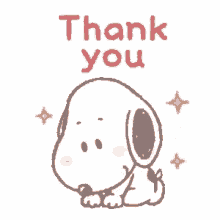